In [1]:
import pandas as pd
import datetime

# Read datasets and basic pre-processing

In [2]:
inverters = pd.read_csv('inverters_03.11.2023-09.02.2024.csv')

In [3]:
weather = pd.read_csv('open-meteo-35.11N33.36E131m.csv')

latitude: 35.114235

longitude: 33.363056

elevation: 131

utc_offset_seconds: 10800	

timezone: Europe/Moscow	 

timezone_abbreviation: MSK	

In [4]:
angles = pd.read_csv('csv_35.149803_33.394086_fixed_23_180_PT5M.csv')

In [5]:
inverters

,date,inverter1,inverter2,inverter3
0,2023-11-03 00:00:45,NaN,0.0,NaN
1,2023-11-03 00:01:00,NaN,0.0,NaN
2,2023-11-03 00:01:15,NaN,0.0,NaN
3,2023-11-03 00:01:30,NaN,0.0,NaN
4,2023-11-03 00:01:45,NaN,0.0,NaN
...,...,...,...,...
316039,2024-02-08 23:30:30,NaN,NaN,0.0
316040,2024-02-08 23:30:45,NaN,NaN,0.0
316041,2024-02-08 23:31:00,NaN,NaN,0.0
316042,2024-02-08 23:31:15,NaN,NaN,0.0


In [6]:
weather

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),global_tilted_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2023-06-01T00:00,17.9,90,16.3,19.0,0.0,0.0,0,0,0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-06-01T01:00,17.1,92,15.9,18.3,0.0,0.0,0,0,0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-06-01T02:00,16.6,91,15.2,17.9,0.0,0.0,0,0,0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-06-01T03:00,17.3,87,15.1,18.1,0.0,0.0,0,0,0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-06-01T04:00,18.3,81,15.0,19.0,0.0,0.0,0,0,0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,2024-06-01T19:00,29.2,33,11.2,28.5,0.0,0.0,0,0,0,...,75,422.9,187,352.2,117.1,70.2,47.0,422.9,117.1,220.6
8804,2024-06-01T20:00,26.9,37,11.1,26.4,0.0,0.0,0,0,0,...,22,109.1,35,99.8,0.0,0.0,0.0,0.0,0.0,0.0
8805,2024-06-01T21:00,25.3,38,10.1,24.4,0.0,0.0,0,0,0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8806,2024-06-01T22:00,24.0,39,9.1,22.8,0.0,0.0,0,0,0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
weather.columns

Index(['time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'weather_code (wmo code)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (°)', 'wind_direction_100m (°)',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'is_day ()',
       'sunshine_duration (s)', 'shortwave_radiation (W/m²)',

In [8]:
angles

,air_temp,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,dni,...,precipitable_water,precipitation_rate,relative_humidity,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,zenith,period_end,period
0,23,-12,0,0,0,0,9.5,17.0,0,0,...,25.2,0.0,68.6,268,259,5.2,2.7,147,2023-10-01T00:05:00+02:00,PT5M
1,23,-14,0,0,0,0,10.9,17.0,0,0,...,25.2,0.0,68.7,267,259,5.2,2.7,147,2023-10-01T00:10:00+02:00,PT5M
2,23,-16,0,0,0,0,0.0,17.0,0,0,...,25.2,0.0,68.7,267,259,5.2,2.7,146,2023-10-01T00:15:00+02:00,PT5M
3,23,-19,0,0,0,0,0.0,16.9,0,0,...,25.2,0.0,68.8,267,258,5.2,2.7,146,2023-10-01T00:20:00+02:00,PT5M
4,23,-21,0,0,0,0,0.0,16.9,0,0,...,25.2,0.0,68.9,267,258,5.2,2.7,146,2023-10-01T00:25:00+02:00,PT5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71419,29,2,0,0,0,0,0.0,9.6,0,0,...,14.4,0.0,30.3,285,273,7.6,4.1,122,2024-06-04T23:40:00+02:00,PT5M
71420,29,1,0,0,0,0,0.0,9.5,0,0,...,14.4,0.0,30.0,285,273,7.5,4.1,122,2024-06-04T23:45:00+02:00,PT5M
71421,29,-1,0,0,0,0,0.0,9.4,0,0,...,14.4,0.0,29.6,285,273,7.5,4.1,122,2024-06-04T23:50:00+02:00,PT5M
71422,29,-2,0,0,0,0,0.0,9.2,0,0,...,14.3,0.0,29.3,285,273,7.4,4.0,122,2024-06-04T23:55:00+02:00,PT5M


## "Fix" the datetime columns

In [9]:
## add 3 hours (not 3 because this period is during the winter time)

inverters['datetime'] = inverters['date'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=3))
inverters

,date,inverter1,inverter2,inverter3,datetime
0,2023-11-03 00:00:45,NaN,0.0,NaN,2023-11-03 03:00:45
1,2023-11-03 00:01:00,NaN,0.0,NaN,2023-11-03 03:01:00
2,2023-11-03 00:01:15,NaN,0.0,NaN,2023-11-03 03:01:15
3,2023-11-03 00:01:30,NaN,0.0,NaN,2023-11-03 03:01:30
4,2023-11-03 00:01:45,NaN,0.0,NaN,2023-11-03 03:01:45
...,...,...,...,...,...
316039,2024-02-08 23:30:30,NaN,NaN,0.0,2024-02-09 02:30:30
316040,2024-02-08 23:30:45,NaN,NaN,0.0,2024-02-09 02:30:45
316041,2024-02-08 23:31:00,NaN,NaN,0.0,2024-02-09 02:31:00
316042,2024-02-08 23:31:15,NaN,NaN,0.0,2024-02-09 02:31:15


In [10]:
## convert to datetime object and add 2 hours

weather['datetime'] = weather['time'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M"))# + datetime.timedelta(hours=1))
weather

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),global_tilted_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),datetime
0,2023-06-01T00:00,17.9,90,16.3,19.0,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 00:00:00
1,2023-06-01T01:00,17.1,92,15.9,18.3,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 01:00:00
2,2023-06-01T02:00,16.6,91,15.2,17.9,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 02:00:00
3,2023-06-01T03:00,17.3,87,15.1,18.1,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 03:00:00
4,2023-06-01T04:00,18.3,81,15.0,19.0,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,2024-06-01T19:00,29.2,33,11.2,28.5,0.0,0.0,0,0,0,...,422.9,187,352.2,117.1,70.2,47.0,422.9,117.1,220.6,2024-06-01 19:00:00
8804,2024-06-01T20:00,26.9,37,11.1,26.4,0.0,0.0,0,0,0,...,109.1,35,99.8,0.0,0.0,0.0,0.0,0.0,0.0,2024-06-01 20:00:00
8805,2024-06-01T21:00,25.3,38,10.1,24.4,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-06-01 21:00:00
8806,2024-06-01T22:00,24.0,39,9.1,22.8,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-06-01 22:00:00


In [11]:
## convert to datetime object

angles['datetime'] = angles['period_end'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S+02:00"))# + datetime.timedelta(hours=1))
angles

,air_temp,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,dni,...,precipitation_rate,relative_humidity,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,zenith,period_end,period,datetime
0,23,-12,0,0,0,0,9.5,17.0,0,0,...,0.0,68.6,268,259,5.2,2.7,147,2023-10-01T00:05:00+02:00,PT5M,2023-10-01 00:05:00
1,23,-14,0,0,0,0,10.9,17.0,0,0,...,0.0,68.7,267,259,5.2,2.7,147,2023-10-01T00:10:00+02:00,PT5M,2023-10-01 00:10:00
2,23,-16,0,0,0,0,0.0,17.0,0,0,...,0.0,68.7,267,259,5.2,2.7,146,2023-10-01T00:15:00+02:00,PT5M,2023-10-01 00:15:00
3,23,-19,0,0,0,0,0.0,16.9,0,0,...,0.0,68.8,267,258,5.2,2.7,146,2023-10-01T00:20:00+02:00,PT5M,2023-10-01 00:20:00
4,23,-21,0,0,0,0,0.0,16.9,0,0,...,0.0,68.9,267,258,5.2,2.7,146,2023-10-01T00:25:00+02:00,PT5M,2023-10-01 00:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71419,29,2,0,0,0,0,0.0,9.6,0,0,...,0.0,30.3,285,273,7.6,4.1,122,2024-06-04T23:40:00+02:00,PT5M,2024-06-04 23:40:00
71420,29,1,0,0,0,0,0.0,9.5,0,0,...,0.0,30.0,285,273,7.5,4.1,122,2024-06-04T23:45:00+02:00,PT5M,2024-06-04 23:45:00
71421,29,-1,0,0,0,0,0.0,9.4,0,0,...,0.0,29.6,285,273,7.5,4.1,122,2024-06-04T23:50:00+02:00,PT5M,2024-06-04 23:50:00
71422,29,-2,0,0,0,0,0.0,9.2,0,0,...,0.0,29.3,285,273,7.4,4.0,122,2024-06-04T23:55:00+02:00,PT5M,2024-06-04 23:55:00


In [12]:
inverters.columns

Index(['date', 'inverter1', 'inverter2', 'inverter3', 'datetime'], dtype='object')

In [13]:
weather.columns

Index(['time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'weather_code (wmo code)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (°)', 'wind_direction_100m (°)',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'is_day ()',
       'sunshine_duration (s)', 'shortwave_radiation (W/m²)',

In [14]:
angles.columns

Index(['air_temp', 'azimuth', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi',
       'clearsky_gti', 'cloud_opacity', 'dewpoint_temp', 'dhi', 'dni', 'ghi',
       'gti', 'precipitable_water', 'precipitation_rate', 'relative_humidity',
       'wind_direction_100m', 'wind_direction_10m', 'wind_speed_100m',
       'wind_speed_10m', 'zenith', 'period_end', 'period', 'datetime'],
      dtype='object')

In [15]:
angles = angles[['datetime','azimuth','zenith']]
angles

,datetime,azimuth,zenith
0,2023-10-01 00:05:00,-12,147
1,2023-10-01 00:10:00,-14,147
2,2023-10-01 00:15:00,-16,146
3,2023-10-01 00:20:00,-19,146
4,2023-10-01 00:25:00,-21,146
...,...,...,...
71419,2024-06-04 23:40:00,2,122
71420,2024-06-04 23:45:00,1,122
71421,2024-06-04 23:50:00,-1,122
71422,2024-06-04 23:55:00,-2,122


In [16]:
angles.columns

Index(['datetime', 'azimuth', 'zenith'], dtype='object')

## Add "missing values" - rows for which there is no data about the inverters

In [17]:
inverters.shape

(316044, 5)

In [18]:
inverters

,date,inverter1,inverter2,inverter3,datetime
0,2023-11-03 00:00:45,NaN,0.0,NaN,2023-11-03 03:00:45
1,2023-11-03 00:01:00,NaN,0.0,NaN,2023-11-03 03:01:00
2,2023-11-03 00:01:15,NaN,0.0,NaN,2023-11-03 03:01:15
3,2023-11-03 00:01:30,NaN,0.0,NaN,2023-11-03 03:01:30
4,2023-11-03 00:01:45,NaN,0.0,NaN,2023-11-03 03:01:45
...,...,...,...,...,...
316039,2024-02-08 23:30:30,NaN,NaN,0.0,2024-02-09 02:30:30
316040,2024-02-08 23:30:45,NaN,NaN,0.0,2024-02-09 02:30:45
316041,2024-02-08 23:31:00,NaN,NaN,0.0,2024-02-09 02:31:00
316042,2024-02-08 23:31:15,NaN,NaN,0.0,2024-02-09 02:31:15


In [19]:
# add extra rows to help with the missing values later

to_add = pd.DataFrame.from_dict({'date':['2023-11-03 02:00:00']})
to_add['inverter1'] = None
to_add['inverter2'] = None
to_add['inverter3'] = None
to_add['datetime'] = to_add['date'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
to_add

,date,inverter1,inverter2,inverter3,datetime
0,2023-11-03 02:00:00,None,None,None,2023-11-03 02:00:00


In [20]:
inverters = pd.concat([to_add,inverters],ignore_index=True)
inverters

,date,inverter1,inverter2,inverter3,datetime
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03 02:00:00
1,2023-11-03 00:00:45,NaN,0.0,NaN,2023-11-03 03:00:45
2,2023-11-03 00:01:00,NaN,0.0,NaN,2023-11-03 03:01:00
3,2023-11-03 00:01:15,NaN,0.0,NaN,2023-11-03 03:01:15
4,2023-11-03 00:01:30,NaN,0.0,NaN,2023-11-03 03:01:30
...,...,...,...,...,...
316040,2024-02-08 23:30:30,NaN,NaN,0.0,2024-02-09 02:30:30
316041,2024-02-08 23:30:45,NaN,NaN,0.0,2024-02-09 02:30:45
316042,2024-02-08 23:31:00,NaN,NaN,0.0,2024-02-09 02:31:00
316043,2024-02-08 23:31:15,NaN,NaN,0.0,2024-02-09 02:31:15


In [21]:
inverters['difference'] = inverters['datetime'].diff()
(inverters['difference'] > datetime.timedelta(hours=1)).sum()

359

In [22]:
inverters[inverters['difference'] > datetime.timedelta(hours=1)]

,date,inverter1,inverter2,inverter3,datetime,difference
1,2023-11-03 00:00:45,NaN,0.0,NaN,2023-11-03 03:00:45,0 days 01:00:45
3018,2023-11-03 16:48:15,NaN,NaN,0.0,2023-11-03 19:48:15,0 days 01:16:00
3061,2023-11-03 18:19:45,NaN,0.0,0.0,2023-11-03 21:19:45,0 days 01:19:45
3090,2023-11-03 19:47:00,NaN,0.0,NaN,2023-11-03 22:47:00,0 days 01:20:15
3127,2023-11-03 21:12:15,NaN,0.0,NaN,2023-11-04 00:12:15,0 days 01:16:15
...,...,...,...,...,...,...
312472,2024-02-07 17:24:30,0.0,NaN,NaN,2024-02-07 20:24:30,0 days 01:17:30
312509,2024-02-07 18:50:00,0.0,NaN,NaN,2024-02-07 21:50:00,0 days 01:16:30
312562,2024-02-07 20:15:45,0.0,NaN,NaN,2024-02-07 23:15:45,0 days 01:12:30
312610,2024-02-07 21:40:45,0.0,0.0,NaN,2024-02-08 00:40:45,0 days 01:07:30


In [23]:
inverters

,date,inverter1,inverter2,inverter3,datetime,difference
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03 02:00:00,NaT
1,2023-11-03 00:00:45,NaN,0.0,NaN,2023-11-03 03:00:45,0 days 01:00:45
2,2023-11-03 00:01:00,NaN,0.0,NaN,2023-11-03 03:01:00,0 days 00:00:15
3,2023-11-03 00:01:15,NaN,0.0,NaN,2023-11-03 03:01:15,0 days 00:00:15
4,2023-11-03 00:01:30,NaN,0.0,NaN,2023-11-03 03:01:30,0 days 00:00:15
...,...,...,...,...,...,...
316040,2024-02-08 23:30:30,NaN,NaN,0.0,2024-02-09 02:30:30,0 days 00:00:15
316041,2024-02-08 23:30:45,NaN,NaN,0.0,2024-02-09 02:30:45,0 days 00:00:15
316042,2024-02-08 23:31:00,NaN,NaN,0.0,2024-02-09 02:31:00,0 days 00:00:15
316043,2024-02-08 23:31:15,NaN,NaN,0.0,2024-02-09 02:31:15,0 days 00:00:15


In [24]:
inverters.shape

(316045, 6)

In [25]:
start = datetime.datetime.strptime('2023-11-03 02:00:00', "%Y-%m-%d %H:%M:%S")
end = datetime.datetime.strptime('2024-02-09 02:00:00', "%Y-%m-%d %H:%M:%S")

In [26]:
list_of_indexes = list(inverters['datetime'])
s = inverters.shape[0]

date_now = start

while date_now!=end :
    if not date_now in list_of_indexes :
        inverters.loc[s,'datetime'] = date_now
    date_now = date_now + datetime.timedelta(hours=1) 
    # check for 1 hour because this is the interval of different data points for the weather data
    s += 1

In [27]:
inverters.shape

(317102, 6)

In [28]:
inverters

,date,inverter1,inverter2,inverter3,datetime,difference
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03 02:00:00,NaT
1,2023-11-03 00:00:45,NaN,0.0,NaN,2023-11-03 03:00:45,0 days 01:00:45
2,2023-11-03 00:01:00,NaN,0.0,NaN,2023-11-03 03:01:00,0 days 00:00:15
3,2023-11-03 00:01:15,NaN,0.0,NaN,2023-11-03 03:01:15,0 days 00:00:15
4,2023-11-03 00:01:30,NaN,0.0,NaN,2023-11-03 03:01:30,0 days 00:00:15
...,...,...,...,...,...,...
318378,NaN,NaN,NaN,NaN,2024-02-08 07:00:00,NaT
318391,NaN,NaN,NaN,NaN,2024-02-08 20:00:00,NaT
318392,NaN,NaN,NaN,NaN,2024-02-08 21:00:00,NaT
318394,NaN,NaN,NaN,NaN,2024-02-08 23:00:00,NaT


In [29]:
inverters = inverters.sort_values(by='datetime')

In [30]:
inverters

,date,inverter1,inverter2,inverter3,datetime,difference
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03 02:00:00,NaT
316046,NaN,NaN,NaN,NaN,2023-11-03 03:00:00,NaT
1,2023-11-03 00:00:45,NaN,0.0,NaN,2023-11-03 03:00:45,0 days 01:00:45
2,2023-11-03 00:01:00,NaN,0.0,NaN,2023-11-03 03:01:00,0 days 00:00:15
3,2023-11-03 00:01:15,NaN,0.0,NaN,2023-11-03 03:01:15,0 days 00:00:15
...,...,...,...,...,...,...
316040,2024-02-08 23:30:30,NaN,NaN,0.0,2024-02-09 02:30:30,0 days 00:00:15
316041,2024-02-08 23:30:45,NaN,NaN,0.0,2024-02-09 02:30:45,0 days 00:00:15
316042,2024-02-08 23:31:00,NaN,NaN,0.0,2024-02-09 02:31:00,0 days 00:00:15
316043,2024-02-08 23:31:15,NaN,NaN,0.0,2024-02-09 02:31:15,0 days 00:00:15


## Rolling window - timedelta window - to downscale

In [31]:
inverters = inverters[['datetime','inverter1','inverter2','inverter3']].set_index('datetime')
inverters = inverters.sort_index()
inverters

,inverter1,inverter2,inverter3
datetime,,,
2023-11-03 02:00:00,NaN,NaN,NaN
2023-11-03 03:00:00,NaN,NaN,NaN
2023-11-03 03:00:45,NaN,0.0,NaN
2023-11-03 03:01:00,NaN,0.0,NaN
2023-11-03 03:01:15,NaN,0.0,NaN
...,...,...,...
2024-02-09 02:30:30,NaN,NaN,0.0
2024-02-09 02:30:45,NaN,NaN,0.0
2024-02-09 02:31:00,NaN,NaN,0.0


In [32]:
data = inverters.rolling(window=pd.Timedelta(hours=1),center=True).mean()
data

,inverter1,inverter2,inverter3
datetime,,,
2023-11-03 02:00:00,NaN,NaN,NaN
2023-11-03 03:00:00,NaN,0.0,NaN
2023-11-03 03:00:45,NaN,0.0,NaN
2023-11-03 03:01:00,NaN,0.0,NaN
2023-11-03 03:01:15,NaN,0.0,NaN
...,...,...,...
2024-02-09 02:30:30,0.0,0.0,0.0
2024-02-09 02:30:45,0.0,0.0,0.0
2024-02-09 02:31:00,0.0,0.0,0.0


In [33]:
## keep only rows at 1 hour

data = data.reset_index()
data = data[data['datetime'].dt.minute == 0]
data = data[data['datetime'].dt.second == 0]
data

,datetime,inverter1,inverter2,inverter3
0,2023-11-03 02:00:00,NaN,NaN,NaN
1,2023-11-03 03:00:00,NaN,0.0,NaN
43,2023-11-03 04:00:00,NaN,0.0,0.0
86,2023-11-03 05:00:00,0.0,0.0,0.0
141,2023-11-03 06:00:00,0.0,0.0,NaN
...,...,...,...,...
316893,2024-02-08 22:00:00,0.0,0.0,0.0
316933,2024-02-08 23:00:00,0.0,NaN,0.0
316998,2024-02-09 00:00:00,NaN,0.0,0.0
317028,2024-02-09 01:00:00,0.0,0.0,0.0


## Merge the datasets

In [34]:
inverters

,inverter1,inverter2,inverter3
datetime,,,
2023-11-03 02:00:00,NaN,NaN,NaN
2023-11-03 03:00:00,NaN,NaN,NaN
2023-11-03 03:00:45,NaN,0.0,NaN
2023-11-03 03:01:00,NaN,0.0,NaN
2023-11-03 03:01:15,NaN,0.0,NaN
...,...,...,...
2024-02-09 02:30:30,NaN,NaN,0.0
2024-02-09 02:30:45,NaN,NaN,0.0
2024-02-09 02:31:00,NaN,NaN,0.0


In [35]:
weather

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),global_tilted_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),datetime
0,2023-06-01T00:00,17.9,90,16.3,19.0,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 00:00:00
1,2023-06-01T01:00,17.1,92,15.9,18.3,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 01:00:00
2,2023-06-01T02:00,16.6,91,15.2,17.9,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 02:00:00
3,2023-06-01T03:00,17.3,87,15.1,18.1,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 03:00:00
4,2023-06-01T04:00,18.3,81,15.0,19.0,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,2024-06-01T19:00,29.2,33,11.2,28.5,0.0,0.0,0,0,0,...,422.9,187,352.2,117.1,70.2,47.0,422.9,117.1,220.6,2024-06-01 19:00:00
8804,2024-06-01T20:00,26.9,37,11.1,26.4,0.0,0.0,0,0,0,...,109.1,35,99.8,0.0,0.0,0.0,0.0,0.0,0.0,2024-06-01 20:00:00
8805,2024-06-01T21:00,25.3,38,10.1,24.4,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-06-01 21:00:00
8806,2024-06-01T22:00,24.0,39,9.1,22.8,0.0,0.0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-06-01 22:00:00


In [36]:
angles

,datetime,azimuth,zenith
0,2023-10-01 00:05:00,-12,147
1,2023-10-01 00:10:00,-14,147
2,2023-10-01 00:15:00,-16,146
3,2023-10-01 00:20:00,-19,146
4,2023-10-01 00:25:00,-21,146
...,...,...,...
71419,2024-06-04 23:40:00,2,122
71420,2024-06-04 23:45:00,1,122
71421,2024-06-04 23:50:00,-1,122
71422,2024-06-04 23:55:00,-2,122


In [37]:
data = data.set_index('datetime').join(weather.set_index('datetime')).join(angles.set_index('datetime'))
data

,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),...,global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),global_tilted_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith
datetime,,,,,,,,,,,,,,,,,,,,,
2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03T02:00,19.6,76,15.2,20.4,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-67,141
2023-11-03 03:00:00,NaN,0.0,NaN,2023-11-03T03:00,19.2,75,14.7,19.8,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-80,129
2023-11-03 04:00:00,NaN,0.0,0.0,2023-11-03T04:00,17.9,80,14.5,18.8,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-89,117
2023-11-03 05:00:00,0.0,0.0,0.0,2023-11-03T05:00,17.4,75,12.9,17.6,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98,105
2023-11-03 06:00:00,0.0,0.0,NaN,2023-11-03T06:00,16.9,71,11.7,17.1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-106,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08 22:00:00,0.0,0.0,0.0,2024-02-08T22:00,11.6,85,9.2,10.3,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,146
2024-02-08 23:00:00,0.0,NaN,0.0,2024-02-08T23:00,11.2,87,9.1,9.9,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,156
2024-02-09 00:00:00,NaN,0.0,0.0,2024-02-09T00:00,10.6,89,8.9,9.1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,160


In [38]:
data.shape

(2353, 50)

In [39]:
data.columns

Index(['inverter1', 'inverter2', 'inverter3', 'time', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'weather_code (wmo code)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (°)', 'wind_direction_100m (°)',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'is_day ()',
       'sunshine_durat

In [40]:
data

,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),...,global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),global_tilted_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith
datetime,,,,,,,,,,,,,,,,,,,,,
2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03T02:00,19.6,76,15.2,20.4,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-67,141
2023-11-03 03:00:00,NaN,0.0,NaN,2023-11-03T03:00,19.2,75,14.7,19.8,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-80,129
2023-11-03 04:00:00,NaN,0.0,0.0,2023-11-03T04:00,17.9,80,14.5,18.8,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-89,117
2023-11-03 05:00:00,0.0,0.0,0.0,2023-11-03T05:00,17.4,75,12.9,17.6,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98,105
2023-11-03 06:00:00,0.0,0.0,NaN,2023-11-03T06:00,16.9,71,11.7,17.1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-106,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08 22:00:00,0.0,0.0,0.0,2024-02-08T22:00,11.6,85,9.2,10.3,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,146
2024-02-08 23:00:00,0.0,NaN,0.0,2024-02-08T23:00,11.2,87,9.1,9.9,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,156
2024-02-09 00:00:00,NaN,0.0,0.0,2024-02-09T00:00,10.6,89,8.9,9.1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,160


# Use formulas to find power and energy

In [41]:
import math

def calculate_Gpoa(DNI, DHI, GHI, thz, gs):
    """
    Calculate the Global Plane of Array Irradiance (Gpoa).
    
    Parameters:
    DNI (float): Direct Normal Irradiance
    DHI (float): Diffuse Horizontal Irradiance
    GHI (float): Global Horizontal Irradiance
    thz (float): Solar Zenith Angle in degrees
    b (float): Surface Tilt Angle in degrees
    gs (float): Solar Azimuth Angle in degrees
    g (float): Surface Azimuth Angle in degrees
    albedo (float): Ground reflectance, default is 0.2
    
    Returns:
    float: Global Plane of Array Irradiance (Gpoa)
    """
    
    b = 17 # surface tilt angle in degrees
    g = -39 # surface azimuth angle in degrees
    albedo = 0.2 # ground reflectance (default value)
    
    # Convert degrees to radians
    thz_rad = math.radians(thz)
    b_rad = math.radians(b)
    gs_rad = math.radians(gs)
    g_rad = math.radians(g)
    
    # Calculate the angle of incidence th
    cos_th = (math.sin(thz_rad) * math.cos(gs_rad - g_rad) * math.sin(b_rad) + 
             math.cos(thz_rad) * math.cos(b_rad))
    
    # Ensure cos_th is within the valid range
    cos_th = max(0, min(cos_th, 1))
    
    # Direct component
    Gpoa_direct = DNI * cos_th
    
    # Diffuse component (assumed isotropic)
    Gpoa_diffuse = DHI * (1 + math.cos(b_rad)) / 2
    
    # Reflected component
    Gpoa_reflected = GHI * albedo * (1 - math.cos(b_rad)) / 2
    
    # Total Gpoa
    Gpoa = Gpoa_direct + Gpoa_diffuse + Gpoa_reflected
    
    return Gpoa

In [42]:
def calculate_energy_output(Gpoa, air_temp, panel_age, panel_size):
    
    # Global constants
    Eo = 1000  # Reference Irradiance (W/m²)
    To = 25  # Reference Temperature (°C)
    g = -0.0042  # Power Temperature Coefficient (%/°C)
    Pmp0 = 270  # PV module rated power (Wp)
    
    # For this system
    performance_ratio = 79.26 # (%)
    system_losses = 12 # (%) around x% (10.7+3.6, 10.7+2.7, 5.9+3.6)
    
    # Derating factors
    Soiling = 1
    Shading = 0
    Snow = 0
    Mismatch = 1
    Wiring = 1
    Connections = 0.5
    LID = 0
    Nameplate = 1
    Age = panel_age
    Availability = 3
    a = -3.47  # Thermal Properties Isc (%/K)
    b = -0.0594  # Thermal Properties Voc (%/K)
    
    # NOCT (Nominal Operating Cell Temperature)
    NOCT = 48
    
    # Insolation in mW/cm²
    S = 80
    
    # Calculate derating factor
    Deratingfactor = (Soiling + Shading + Snow + Mismatch + Wiring + Connections + 
                      LID + Nameplate + Age + Availability + a + b)
    
    # Calculate module temperature
    Tm = air_temp + ((NOCT - 20) / 80) * S
    
    # Calculate predicted power production
    if Gpoa >= 125:
        p = ((Gpoa / Eo) * Pmp0 * (1 + g * (Tm - To))) * ((100 - Deratingfactor) / 100)
    else:
        p = ((0.008 * (Gpoa ** 2) / Eo) * Pmp0 * (1 + g * (Tm - To))) * ((100 - Deratingfactor) / 100)
    
    if p < 1:
        p = 0
    
    # System losses and performance ratio adjustments
    s1 = (100 - system_losses) / 100
    s2 = 1 - ((100 - performance_ratio) / 100)
    
    # Calculate energy output
    energy = panel_size * p * s1 * s2
    
    #print(Deratingfactor)
    return energy

In [43]:
data.columns

Index(['inverter1', 'inverter2', 'inverter3', 'time', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'weather_code (wmo code)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'et0_fao_evapotranspiration (mm)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (°)', 'wind_direction_100m (°)',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'is_day ()',
       'sunshine_durat

Shortwave Solar Radiation GHI

Direct Solar Radiation

Diffuse Solar Radiation DHI

Direct Normal Irradiance DNI

Global Tilted Radiation GTI

Terrestrial Solar Radiation

Shortwave Solar Radiation GHI (Instant)

Direct Solar Radiation (Instant)

Diffuse Solar Radiation DHI (Instant)

Direct Normal Irradiance DNI (Instant)

Global Tilted Radiation GTI

Terrestrial Solar Radiation (Instant)

In [44]:
data2 = data.reset_index()[['datetime', 'inverter1', 'inverter2', 'inverter3', 'time', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_gusts_10m (km/h)', 'is_day ()',
       'sunshine_duration (s)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)',
       'terrestrial_radiation (W/m²)', 'shortwave_radiation_instant (W/m²)',
       'direct_radiation_instant (W/m²)', 'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)', 'azimuth', 'zenith']]

In [45]:
data2.shape

(2353, 32)

In [46]:
data2

,datetime,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),...,direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03T02:00,19.6,76,20.4,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-67,141
1,2023-11-03 03:00:00,NaN,0.0,NaN,2023-11-03T03:00,19.2,75,19.8,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-80,129
2,2023-11-03 04:00:00,NaN,0.0,0.0,2023-11-03T04:00,17.9,80,18.8,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-89,117
3,2023-11-03 05:00:00,0.0,0.0,0.0,2023-11-03T05:00,17.4,75,17.6,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-98,105
4,2023-11-03 06:00:00,0.0,0.0,NaN,2023-11-03T06:00,16.9,71,17.1,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-106,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,2024-02-08 22:00:00,0.0,0.0,0.0,2024-02-08T22:00,11.6,85,10.3,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,62,146
2349,2024-02-08 23:00:00,0.0,NaN,0.0,2024-02-08T23:00,11.2,87,9.9,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,39,156
2350,2024-02-09 00:00:00,NaN,0.0,0.0,2024-02-09T00:00,10.6,89,9.1,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,160
2351,2024-02-09 01:00:00,0.0,0.0,0.0,2024-02-09T01:00,11.2,86,9.9,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,-36,156


## Calculate Gpoa 

In [47]:
data2.columns

Index(['datetime', 'inverter1', 'inverter2', 'inverter3', 'time',
       'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)',
       'cloud_cover_high (%)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_gusts_10m (km/h)', 'is_day ()',
       'sunshine_duration (s)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)',
       'terrestrial_radiation (W/m²)', 'shortwave_radiation_instant (W/m²)',
       'direct_radiation_instant (W/m²)', 'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)', 'azimuth', 'zenith'],
      dtype='object')

In [48]:
data2['Gpoa (W/m²)'] = data2.apply(lambda x: calculate_Gpoa(x['direct_normal_irradiance (W/m²)'], x['diffuse_radiation (W/m²)'], x['shortwave_radiation (W/m²)'], x['zenith'], x['azimuth']), axis=1)

In [49]:
data2

,datetime,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),...,global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith,Gpoa (W/m²)
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03T02:00,19.6,76,20.4,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-67,141,0.0
1,2023-11-03 03:00:00,NaN,0.0,NaN,2023-11-03T03:00,19.2,75,19.8,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-80,129,0.0
2,2023-11-03 04:00:00,NaN,0.0,0.0,2023-11-03T04:00,17.9,80,18.8,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-89,117,0.0
3,2023-11-03 05:00:00,0.0,0.0,0.0,2023-11-03T05:00,17.4,75,17.6,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-98,105,0.0
4,2023-11-03 06:00:00,0.0,0.0,NaN,2023-11-03T06:00,16.9,71,17.1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-106,93,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,2024-02-08 22:00:00,0.0,0.0,0.0,2024-02-08T22:00,11.6,85,10.3,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,62,146,0.0
2349,2024-02-08 23:00:00,0.0,NaN,0.0,2024-02-08T23:00,11.2,87,9.9,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,39,156,0.0
2350,2024-02-09 00:00:00,NaN,0.0,0.0,2024-02-09T00:00,10.6,89,9.1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2,160,0.0
2351,2024-02-09 01:00:00,0.0,0.0,0.0,2024-02-09T01:00,11.2,86,9.9,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,-36,156,0.0


In [50]:
panel_size_1 = 63*1.7*1
panel_size_2 = 56*1.7*1
panel_size_3 = 34*1.7*1

In [51]:
data2['energy1'] = data2.apply(lambda x: calculate_energy_output(x['Gpoa (W/m²)'],x['temperature_2m (°C)'],5,panel_size_1), axis=1)
data2['energy2'] = data2.apply(lambda x: calculate_energy_output(x['Gpoa (W/m²)'],x['temperature_2m (°C)'],5,panel_size_2), axis=1)
data2['energy3'] = data2.apply(lambda x: calculate_energy_output(x['Gpoa (W/m²)'],x['temperature_2m (°C)'],5,panel_size_3), axis=1)

In [52]:
data2

,datetime,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),...,direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith,Gpoa (W/m²),energy1,energy2,energy3
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03T02:00,19.6,76,20.4,0.0,0.0,...,0.0,0.0,0.0,0.0,-67,141,0.0,0.0,0.0,0.0
1,2023-11-03 03:00:00,NaN,0.0,NaN,2023-11-03T03:00,19.2,75,19.8,0.0,0.0,...,0.0,0.0,0.0,0.0,-80,129,0.0,0.0,0.0,0.0
2,2023-11-03 04:00:00,NaN,0.0,0.0,2023-11-03T04:00,17.9,80,18.8,0.0,0.0,...,0.0,0.0,0.0,0.0,-89,117,0.0,0.0,0.0,0.0
3,2023-11-03 05:00:00,0.0,0.0,0.0,2023-11-03T05:00,17.4,75,17.6,0.0,0.0,...,0.0,0.0,0.0,0.0,-98,105,0.0,0.0,0.0,0.0
4,2023-11-03 06:00:00,0.0,0.0,NaN,2023-11-03T06:00,16.9,71,17.1,0.0,0.0,...,0.0,0.0,0.0,0.0,-106,93,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,2024-02-08 22:00:00,0.0,0.0,0.0,2024-02-08T22:00,11.6,85,10.3,0.0,0.0,...,0.0,0.0,0.0,0.0,62,146,0.0,0.0,0.0,0.0
2349,2024-02-08 23:00:00,0.0,NaN,0.0,2024-02-08T23:00,11.2,87,9.9,0.0,0.0,...,0.0,0.0,0.0,0.0,39,156,0.0,0.0,0.0,0.0
2350,2024-02-09 00:00:00,NaN,0.0,0.0,2024-02-09T00:00,10.6,89,9.1,0.0,0.0,...,0.0,0.0,0.0,0.0,2,160,0.0,0.0,0.0,0.0
2351,2024-02-09 01:00:00,0.0,0.0,0.0,2024-02-09T01:00,11.2,86,9.9,0.0,0.0,...,0.0,0.0,0.0,0.0,-36,156,0.0,0.0,0.0,0.0


<Axes: >

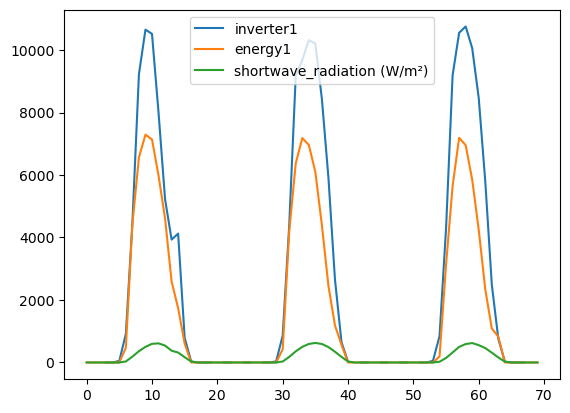

In [53]:
data2[['inverter1','energy1','shortwave_radiation (W/m²)']][0:70].plot()

## Calculate percentage error

In [54]:
data2.shape

(2353, 36)

In [55]:
errors = data2
errors = errors[errors['inverter1']!=0]
errors = errors[errors['inverter2']!=0]
errors = errors[errors['inverter3']!=0]

In [56]:
errors.shape

(1142, 36)

In [57]:
errors

,datetime,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),...,direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith,Gpoa (W/m²),energy1,energy2,energy3
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03T02:00,19.6,76,20.4,0.0,0.0,...,0.0,0.0,0.0,0.0,-67,141,0.000000,0.000000,0.000000,0.000000
5,2023-11-03 07:00:00,51.310345,39.655172,8.229358,2023-11-03T07:00,16.5,75,16.7,0.0,0.0,...,0.0,0.0,0.0,0.0,-115,81,0.000000,0.000000,0.000000,0.000000
6,2023-11-03 08:00:00,914.458333,1173.825000,394.241667,2023-11-03T08:00,19.3,59,19.1,0.0,0.0,...,30.5,41.4,199.2,213.1,-125,71,59.594470,472.786113,420.254322,255.154410
7,2023-11-03 09:00:00,4468.512500,5724.183333,2198.875000,2023-11-03T09:00,22.1,53,22.0,0.0,0.0,...,164.1,89.5,494.3,461.3,-137,62,269.536137,4426.982855,3935.095871,2389.165350
8,2023-11-03 10:00:00,9221.608333,8497.904167,5025.016667,2023-11-03T10:00,23.9,52,24.3,0.0,0.0,...,319.7,104.2,669.3,664.0,-152,54,402.994663,6563.029589,5833.804079,3541.952476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,2024-02-08 14:00:00,7396.816667,6590.200000,3963.641667,2024-02-08T14:00,19.8,48,19.0,0.0,0.0,...,225.5,238.2,367.5,863.0,146,58,337.194333,5598.035364,4976.031435,3021.161942
2341,2024-02-08 15:00:00,4568.241667,3966.054167,2314.233333,2024-02-08T15:00,20.0,48,18.7,0.0,0.0,...,78.6,249.8,146.8,753.1,132,66,284.025477,4710.955909,4187.516364,2542.420649
2342,2024-02-08 16:00:00,2689.154167,2247.891667,1249.329167,2024-02-08T16:00,18.5,54,16.9,0.0,0.0,...,77.5,195.5,188.8,577.4,121,75,223.425729,3731.668304,3317.038492,2013.916228
2343,2024-02-08 17:00:00,1430.770833,1202.529167,594.954167,2024-02-08T17:00,17.0,59,15.4,0.0,0.0,...,20.9,105.9,84.4,348.1,112,86,139.640457,2348.434165,2087.497036,1267.408915


In [58]:
errors = errors.dropna()

In [59]:
errors.shape

(1051, 36)

In [60]:
errors['error1'] = (abs(errors['energy1']-errors['inverter1'])/errors['inverter1'])
errors['error2'] = (abs(errors['energy2']-errors['inverter2'])/errors['inverter2'])
errors['error3'] = (abs(errors['energy3']-errors['inverter3'])/errors['inverter3'])

C:\Users\tsiop\AppData\Local\Temp\ipykernel_11496\620654192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['error1'] = (abs(errors['energy1']-errors['inverter1'])/errors['inverter1'])
C:\Users\tsiop\AppData\Local\Temp\ipykernel_11496\620654192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['error2'] = (abs(errors['energy2']-errors['inverter2'])/errors['inverter2'])
C:\Users\tsiop\AppData\Local\Temp\ipykernel_11496\620654192.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In [61]:
print(errors['error1'].min())
print(errors['error1'].max())
print(errors['error1'].mean())

0.0010390123692062044
21.43544142086777
0.5676274688448033


In [62]:
print(errors['error2'].min())
print(errors['error2'].max())
print(errors['error2'].mean())

0.00038625252234282347
30.315871316197736
0.6168659179389403


In [63]:
print(errors['error3'].min())
print(errors['error3'].max())
print(errors['error3'].mean())

0.0001670161308416607
79.5134824551884
0.8205807034176998


<Axes: >

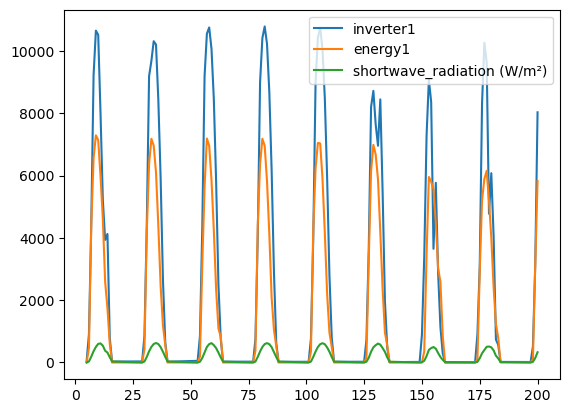

In [64]:
errors[['inverter1','energy1','shortwave_radiation (W/m²)']][0:100].plot()

<Axes: >

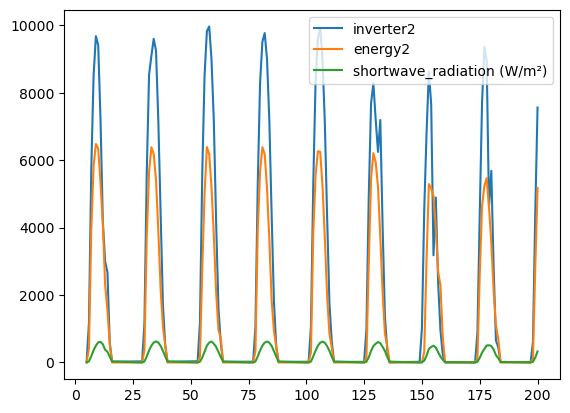

In [65]:
errors[['inverter2','energy2','shortwave_radiation (W/m²)']][0:100].plot()

<Axes: >

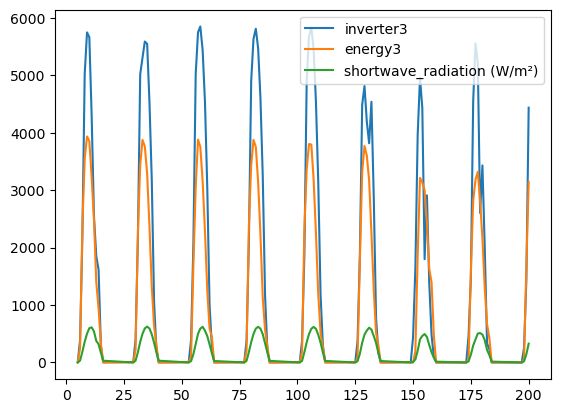

In [66]:
errors[['inverter3','energy3','shortwave_radiation (W/m²)']][0:100].plot()

In [67]:
errors.columns

Index(['datetime', 'inverter1', 'inverter2', 'inverter3', 'time',
       'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)',
       'cloud_cover_high (%)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_gusts_10m (km/h)', 'is_day ()',
       'sunshine_duration (s)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)',
       'direct_normal_irradiance (W/m²)', 'global_tilted_irradiance (W/m²)',
       'terrestrial_radiation (W/m²)', 'shortwave_radiation_instant (W/m²)',
       'direct_radiation_instant (W/m²)', 'diffuse_radiation_instant (W/m²)',
       'direct_normal_irradiance_instant (W/m²)',
       'terrestrial_radiation_instant (W/m²)', 'azimuth', 'zenith',
       'Gpoa (W/m²)', 'energy1', 'energy2', 'energy3', 'error1', 'error2',
       'error3'],
      dtype='object')

# to csv

In [68]:
data

,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),...,global_tilted_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),global_tilted_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith
datetime,,,,,,,,,,,,,,,,,,,,,
2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03T02:00,19.6,76,15.2,20.4,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-67,141
2023-11-03 03:00:00,NaN,0.0,NaN,2023-11-03T03:00,19.2,75,14.7,19.8,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-80,129
2023-11-03 04:00:00,NaN,0.0,0.0,2023-11-03T04:00,17.9,80,14.5,18.8,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-89,117
2023-11-03 05:00:00,0.0,0.0,0.0,2023-11-03T05:00,17.4,75,12.9,17.6,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98,105
2023-11-03 06:00:00,0.0,0.0,NaN,2023-11-03T06:00,16.9,71,11.7,17.1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-106,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08 22:00:00,0.0,0.0,0.0,2024-02-08T22:00,11.6,85,9.2,10.3,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,146
2024-02-08 23:00:00,0.0,NaN,0.0,2024-02-08T23:00,11.2,87,9.1,9.9,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,156
2024-02-09 00:00:00,NaN,0.0,0.0,2024-02-09T00:00,10.6,89,8.9,9.1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,160


In [69]:
data2

,datetime,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),...,direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),azimuth,zenith,Gpoa (W/m²),energy1,energy2,energy3
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03T02:00,19.6,76,20.4,0.0,0.0,...,0.0,0.0,0.0,0.0,-67,141,0.0,0.0,0.0,0.0
1,2023-11-03 03:00:00,NaN,0.0,NaN,2023-11-03T03:00,19.2,75,19.8,0.0,0.0,...,0.0,0.0,0.0,0.0,-80,129,0.0,0.0,0.0,0.0
2,2023-11-03 04:00:00,NaN,0.0,0.0,2023-11-03T04:00,17.9,80,18.8,0.0,0.0,...,0.0,0.0,0.0,0.0,-89,117,0.0,0.0,0.0,0.0
3,2023-11-03 05:00:00,0.0,0.0,0.0,2023-11-03T05:00,17.4,75,17.6,0.0,0.0,...,0.0,0.0,0.0,0.0,-98,105,0.0,0.0,0.0,0.0
4,2023-11-03 06:00:00,0.0,0.0,NaN,2023-11-03T06:00,16.9,71,17.1,0.0,0.0,...,0.0,0.0,0.0,0.0,-106,93,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,2024-02-08 22:00:00,0.0,0.0,0.0,2024-02-08T22:00,11.6,85,10.3,0.0,0.0,...,0.0,0.0,0.0,0.0,62,146,0.0,0.0,0.0,0.0
2349,2024-02-08 23:00:00,0.0,NaN,0.0,2024-02-08T23:00,11.2,87,9.9,0.0,0.0,...,0.0,0.0,0.0,0.0,39,156,0.0,0.0,0.0,0.0
2350,2024-02-09 00:00:00,NaN,0.0,0.0,2024-02-09T00:00,10.6,89,9.1,0.0,0.0,...,0.0,0.0,0.0,0.0,2,160,0.0,0.0,0.0,0.0
2351,2024-02-09 01:00:00,0.0,0.0,0.0,2024-02-09T01:00,11.2,86,9.9,0.0,0.0,...,0.0,0.0,0.0,0.0,-36,156,0.0,0.0,0.0,0.0


In [70]:
set(data.columns).difference(set(data2.columns))

{'dew_point_2m (°C)',
 'et0_fao_evapotranspiration (mm)',
 'global_tilted_irradiance_instant (W/m²)',
 'pressure_msl (hPa)',
 'snow_depth (m)',
 'snowfall (cm)',
 'soil_moisture_0_to_7cm (m³/m³)',
 'soil_moisture_100_to_255cm (m³/m³)',
 'soil_moisture_28_to_100cm (m³/m³)',
 'soil_moisture_7_to_28cm (m³/m³)',
 'soil_temperature_0_to_7cm (°C)',
 'soil_temperature_100_to_255cm (°C)',
 'soil_temperature_28_to_100cm (°C)',
 'soil_temperature_7_to_28cm (°C)',
 'surface_pressure (hPa)',
 'vapour_pressure_deficit (kPa)',
 'weather_code (wmo code)',
 'wind_direction_100m (°)',
 'wind_direction_10m (°)'}

In [71]:
set(data2.columns).difference(set(data.columns))

{'Gpoa (W/m²)', 'datetime', 'energy1', 'energy2', 'energy3'}

In [72]:
errors

,datetime,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),...,terrestrial_radiation_instant (W/m²),azimuth,zenith,Gpoa (W/m²),energy1,energy2,energy3,error1,error2,error3
5,2023-11-03 07:00:00,51.310345,39.655172,8.229358,2023-11-03T07:00,16.5,75,16.7,0.0,0.0,...,0.0,-115,81,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
6,2023-11-03 08:00:00,914.458333,1173.825000,394.241667,2023-11-03T08:00,19.3,59,19.1,0.0,0.0,...,213.1,-125,71,59.594470,472.786113,420.254322,255.154410,0.482988,0.641979,0.352797
7,2023-11-03 09:00:00,4468.512500,5724.183333,2198.875000,2023-11-03T09:00,22.1,53,22.0,0.0,0.0,...,461.3,-137,62,269.536137,4426.982855,3935.095871,2389.165350,0.009294,0.312549,0.086540
8,2023-11-03 10:00:00,9221.608333,8497.904167,5025.016667,2023-11-03T10:00,23.9,52,24.3,0.0,0.0,...,664.0,-152,54,402.994663,6563.029589,5833.804079,3541.952476,0.288299,0.313501,0.295136
9,2023-11-03 11:00:00,10651.966667,9678.525000,5746.170833,2023-11-03T11:00,25.7,44,25.9,0.0,0.0,...,807.3,-170,50,451.503509,7290.358359,6480.318542,3934.479115,0.315586,0.330444,0.315287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,2024-02-08 14:00:00,7396.816667,6590.200000,3963.641667,2024-02-08T14:00,19.8,48,19.0,0.0,0.0,...,863.0,146,58,337.194333,5598.035364,4976.031435,3021.161942,0.243183,0.244935,0.237781
2341,2024-02-08 15:00:00,4568.241667,3966.054167,2314.233333,2024-02-08T15:00,20.0,48,18.7,0.0,0.0,...,753.1,132,66,284.025477,4710.955909,4187.516364,2542.420649,0.031241,0.055839,0.098602
2342,2024-02-08 16:00:00,2689.154167,2247.891667,1249.329167,2024-02-08T16:00,18.5,54,16.9,0.0,0.0,...,577.4,121,75,223.425729,3731.668304,3317.038492,2013.916228,0.387674,0.475622,0.611998
2343,2024-02-08 17:00:00,1430.770833,1202.529167,594.954167,2024-02-08T17:00,17.0,59,15.4,0.0,0.0,...,348.1,112,86,139.640457,2348.434165,2087.497036,1267.408915,0.641377,0.735922,1.130263


In [73]:
data3 = data2.set_index('datetime').join(errors[['datetime','error1','error2','error3']].set_index('datetime'))

In [74]:
data3 = data3.reset_index()

In [75]:
data3

,datetime,inverter1,inverter2,inverter3,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),rain (mm),...,terrestrial_radiation_instant (W/m²),azimuth,zenith,Gpoa (W/m²),energy1,energy2,energy3,error1,error2,error3
0,2023-11-03 02:00:00,NaN,NaN,NaN,2023-11-03T02:00,19.6,76,20.4,0.0,0.0,...,0.0,-67,141,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2023-11-03 03:00:00,NaN,0.0,NaN,2023-11-03T03:00,19.2,75,19.8,0.0,0.0,...,0.0,-80,129,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2023-11-03 04:00:00,NaN,0.0,0.0,2023-11-03T04:00,17.9,80,18.8,0.0,0.0,...,0.0,-89,117,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2023-11-03 05:00:00,0.0,0.0,0.0,2023-11-03T05:00,17.4,75,17.6,0.0,0.0,...,0.0,-98,105,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2023-11-03 06:00:00,0.0,0.0,NaN,2023-11-03T06:00,16.9,71,17.1,0.0,0.0,...,0.0,-106,93,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,2024-02-08 22:00:00,0.0,0.0,0.0,2024-02-08T22:00,11.6,85,10.3,0.0,0.0,...,0.0,62,146,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2349,2024-02-08 23:00:00,0.0,NaN,0.0,2024-02-08T23:00,11.2,87,9.9,0.0,0.0,...,0.0,39,156,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2350,2024-02-09 00:00:00,NaN,0.0,0.0,2024-02-09T00:00,10.6,89,9.1,0.0,0.0,...,0.0,2,160,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2351,2024-02-09 01:00:00,0.0,0.0,0.0,2024-02-09T01:00,11.2,86,9.9,0.0,0.0,...,0.0,-36,156,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [77]:
data3.to_csv('data_november23_february24_openmeteo-hour.csv',index=False)